#### Logistic Regression 
#### Output variable -> y
#### y -> Whether the client has subscribed a term deposit or not 
#### Binomial ("yes" or "no")

In [7]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:
#Loading the dataset
df=pd.read_csv("bank-full.csv", sep=';')

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [11]:
unique_values_per_column = {}

for column in df.columns:
    unique_values_per_column[column] = df[column].unique()

# Print or access the unique values for each column
for column, unique_values in unique_values_per_column.items():
    print(f"Unique values for {column}:\n{unique_values}\n")


Unique values for age:
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

Unique values for job:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values for marital:
['married' 'single' 'divorced']

Unique values for education:
['tertiary' 'secondary' 'unknown' 'primary']

Unique values for default:
['no' 'yes']

Unique values for balance:
[ 2143    29     2 ...  8205 14204 16353]

Unique values for housing:
['yes' 'no']

Unique values for loan:
['no' 'yes']

Unique values for contact:
['unknown' 'cellular' 'telephone']

Unique values for day:
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

Unique values for month:
['may' 'jun' 'jul' 'aug' 'oct' 'n

In [12]:
# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create dummy variables for categorical columns
df_dummies = pd.get_dummies(df[categorical_columns])

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

# Drop the original categorical columns
df = df.drop(categorical_columns, axis=1)

print(df.head())


   age  balance  day  duration  campaign  pdays  previous   y  job_admin.  \
0   58     2143    5       261         1     -1         0  no       False   
1   44       29    5       151         1     -1         0  no       False   
2   33        2    5        76         1     -1         0  no       False   
3   47     1506    5        92         1     -1         0  no       False   
4   33        1    5       198         1     -1         0  no       False   

   job_blue-collar  ...  month_jun  month_mar  month_may  month_nov  \
0            False  ...      False      False       True      False   
1            False  ...      False      False       True      False   
2            False  ...      False      False       True      False   
3             True  ...      False      False       True      False   
4            False  ...      False      False       True      False   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0      False      False        

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   balance              45211 non-null  int64 
 2   day                  45211 non-null  int64 
 3   duration             45211 non-null  int64 
 4   campaign             45211 non-null  int64 
 5   pdays                45211 non-null  int64 
 6   previous             45211 non-null  int64 
 7   y                    45211 non-null  object
 8   job_admin.           45211 non-null  bool  
 9   job_blue-collar      45211 non-null  bool  
 10  job_entrepreneur     45211 non-null  bool  
 11  job_housemaid        45211 non-null  bool  
 12  job_management       45211 non-null  bool  
 13  job_retired          45211 non-null  bool  
 14  job_self-employed    45211 non-null  bool  
 15  job_services         45211 non-null  bool  
 16  job_

In [14]:
df.nunique().sum()

9587

In [15]:
df.duplicated().sum()

0

In [16]:
column_counts = df.nunique()

# Print or access the count of unique values for each column
for column, count in column_counts.items():
    print(f"Column: {column}, Number of unique values: {count}")


Column: age, Number of unique values: 77
Column: balance, Number of unique values: 7168
Column: day, Number of unique values: 31
Column: duration, Number of unique values: 1573
Column: campaign, Number of unique values: 48
Column: pdays, Number of unique values: 559
Column: previous, Number of unique values: 41
Column: y, Number of unique values: 2
Column: job_admin., Number of unique values: 2
Column: job_blue-collar, Number of unique values: 2
Column: job_entrepreneur, Number of unique values: 2
Column: job_housemaid, Number of unique values: 2
Column: job_management, Number of unique values: 2
Column: job_retired, Number of unique values: 2
Column: job_self-employed, Number of unique values: 2
Column: job_services, Number of unique values: 2
Column: job_student, Number of unique values: 2
Column: job_technician, Number of unique values: 2
Column: job_unemployed, Number of unique values: 2
Column: job_unknown, Number of unique values: 2
Column: marital_divorced, Number of unique valu

In [17]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,False,False,...,False,False,True,False,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,no,False,False,...,False,False,True,False,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,no,False,False,...,False,False,True,False,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,no,False,True,...,False,False,True,False,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,no,False,False,...,False,False,True,False,False,False,False,False,False,True


In [18]:
df['y'] = label_encoder.fit_transform(df['y'])

In [19]:
# List of binary columns
binary_columns = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
                   'job_management', 'job_retired', 'job_self-employed', 'job_services',
                   'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
                   'marital_divorced', 'marital_married', 'marital_single',
                   'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown',
                   'default_no', 'default_yes', 'housing_no', 'housing_yes',
                   'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown',
                   'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
                   'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
                   'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
                   'poutcome_success', 'poutcome_unknown']

# Convert binary columns to 0 and 1
df[binary_columns] = df[binary_columns].astype(int)

# Display the updated DataFrame
print(df.head())


   age  balance  day  duration  campaign  pdays  previous  y  job_admin.  \
0   58     2143    5       261         1     -1         0  0           0   
1   44       29    5       151         1     -1         0  0           0   
2   33        2    5        76         1     -1         0  0           0   
3   47     1506    5        92         1     -1         0  0           0   
4   33        1    5       198         1     -1         0  0           0   

   job_blue-collar  ...  month_jun  month_mar  month_may  month_nov  \
0                0  ...          0          0          1          0   
1                0  ...          0          0          1          0   
2                0  ...          0          0          1          0   
3                1  ...          0          0          1          0   
4                0  ...          0          0          1          0   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0          0              

In [20]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [21]:
# Dividing our data into input and output variables 
X = df.drop('y', axis=1)  
Y = df['y']

In [22]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = classifier.predict(X)

In [24]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [25]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [26]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39136   786]
 [ 4099  1190]]


In [27]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.22      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



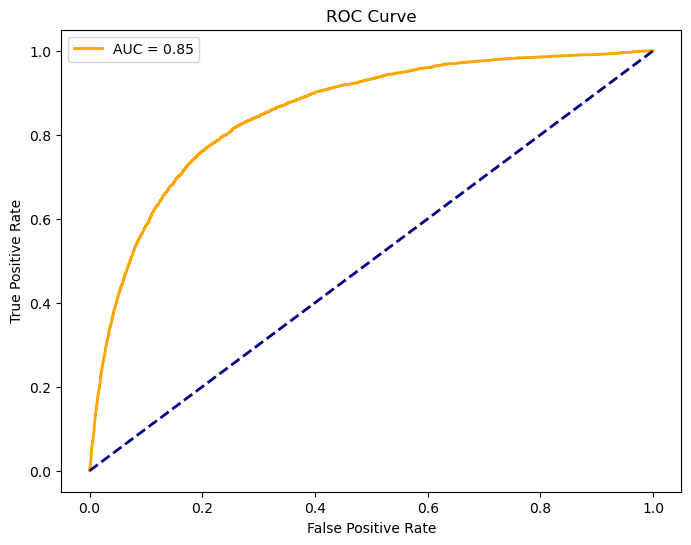

AUC Score: 0.8538954042250416


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, y_pred_prob)

# Calculate AUC score
auc = roc_auc_score(Y, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("AUC Score:", auc)


In [31]:
print("AUC Score:", auc)

AUC Score: 0.8538954042250416
